#Fake News Classifier

In [ ]:
##Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re
import string

##Importing and unzippiing data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import zipfile

zip_path = '/content/drive/MyDrive/data.zip'
extract_path = '/content'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

##Loading dataset

In [6]:
data_fake = pd.read_csv('/content/data/Fake.csv')
data_true = pd.read_csv('/content/data/True.csv')

In [9]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [13]:
data_fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [10]:
data_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [14]:
data_true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [11]:
data_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [15]:
data_fake['class'] = 0
data_true['class'] = 1

In [16]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

####Most Common Words (Bar Plot)

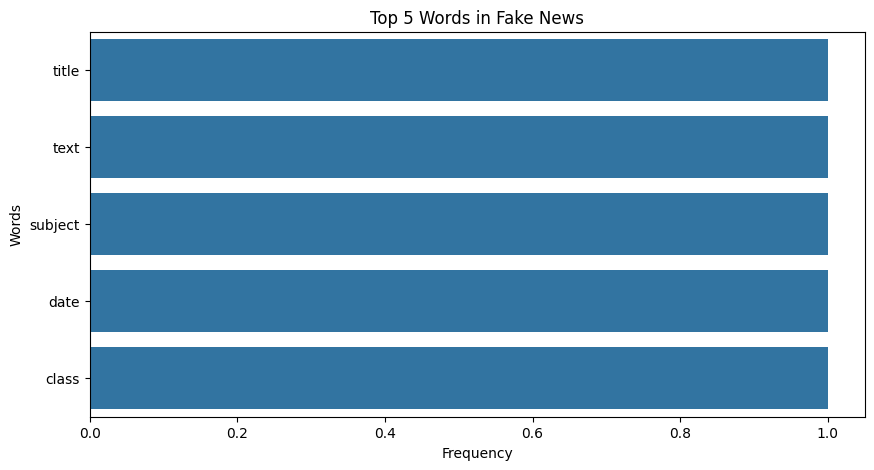

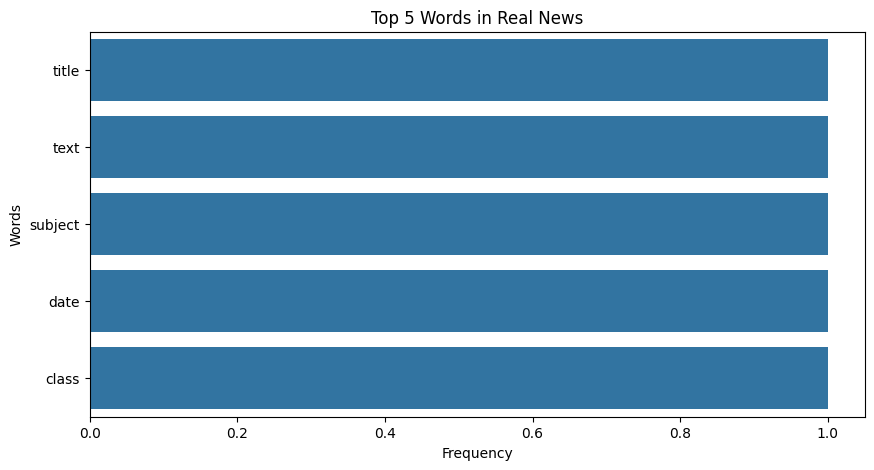

In [92]:
from collections import Counter
import itertools

fake_freq = Counter(data_fake).most_common(5)
real_freq = Counter(data_true).most_common(5)

# Plotting Fake
plt.figure(figsize=(10,5))
sns.barplot(x=[i[1] for i in fake_freq], y=[i[0] for i in fake_freq])
plt.title("Top 5 Words in Fake News")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

# Plotting Real
plt.figure(figsize=(10,5))
sns.barplot(x=[i[1] for i in real_freq], y=[i[0] for i in real_freq])
plt.title("Top 5 Words in Real News")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

Merging fake and true data

In [18]:
data_merged = pd.concat([data_fake, data_true], axis = 0)
data_merged.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [19]:
data_merged.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [20]:
data = data_merged.drop(['title','subject','date'], axis = 1)

In [22]:
data.columns

Index(['text', 'class'], dtype='object')

In [23]:
data.isnull().sum()

,0
text,0
class,0


In [24]:
# Randon suffling of data
data = data.sample(frac = 1)

In [26]:
data.head()

,text,class
19709,SEOUL (Reuters) - In response to Pyongyang s n...,1
20517,Girls aren t the only gender who will suffer e...,0
5019,Trump hates the media with a passion. He often...,0
9292,"As the name of the suspect, identified as 24-y...",0
23062,21st Century Wire says RUSSIA HACK? Still no e...,0


In [27]:
data.reset_index(inplace = True)
data.drop(['index'], axis=1, inplace=True)

In [30]:
data.head()

,text,class
0,SEOUL (Reuters) - In response to Pyongyang s n...,1
1,Girls aren t the only gender who will suffer e...,0
2,Trump hates the media with a passion. He often...,0
3,"As the name of the suspect, identified as 24-y...",0
4,21st Century Wire says RUSSIA HACK? Still no e...,0


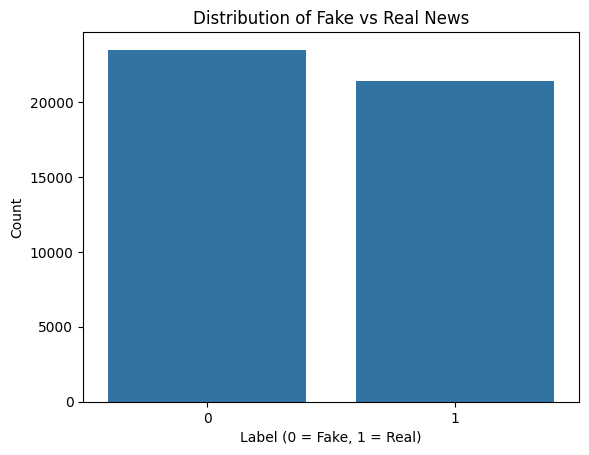

In [81]:
sns.countplot(x='class', data=data)
plt.title('Distribution of Fake vs Real News')
plt.xlabel('Label (0 = Fake, 1 = Real)')
plt.ylabel('Count')
plt.show()

##Data Pre-processing (and Stemming)

In [31]:
def process_text(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('\\W'," ", text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)

  return text

In [32]:
data['text'] = data['text'].apply(process_text)

In [33]:
data.head()

,text,class
0,seoul reuters in response to pyongyang s n...,1
1,girls aren t the only gender who will suffer e...,0
2,trump hates the media with a passion he often...,0
3,as the name of the suspect identified as yea...,0
4,century wire says russia hack still no evide...,0


In [34]:
x = data['text']
y = data['class']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

####News Length Distribution

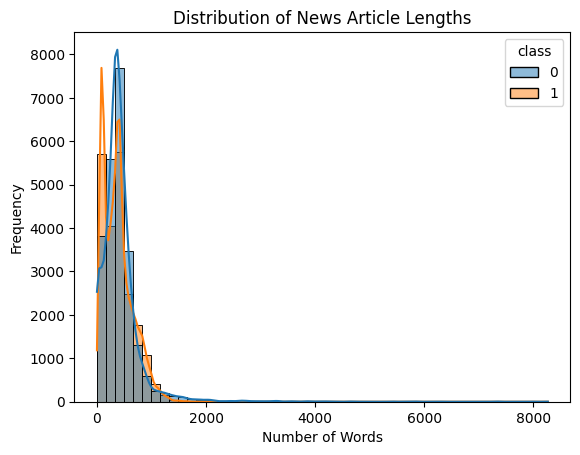

In [90]:
data['text_length'] = data['text'].apply(lambda x: len(str(x).split()))
sns.histplot(data=data, x='text_length', hue='class', bins=50, kde=True)
plt.title("Distribution of News Article Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

##TF-ID

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

##1. Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [42]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [43]:
pred_lr = LR.predict(xv_test)

In [44]:
LR.score(xv_test, y_test)

0.9866369710467706

In [45]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5802
           1       0.99      0.99      0.99      5423

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

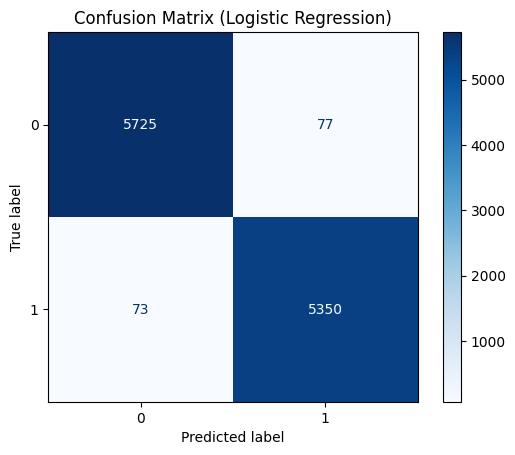

In [84]:
cm_lr = confusion_matrix(y_test, pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=LR.classes_)
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

##2. Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [49]:
pred_dt = DT.predict(xv_test)

In [50]:
DT.score(xv_test, y_test)

0.9966146993318485

In [51]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5802
           1       1.00      1.00      1.00      5423

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



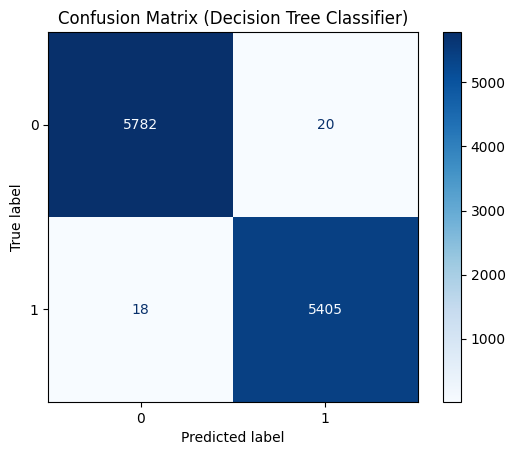

In [87]:
cm_dt = confusion_matrix(y_test, pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=DT.classes_)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Decision Tree Classifier)")
plt.show()

####Feature Importance

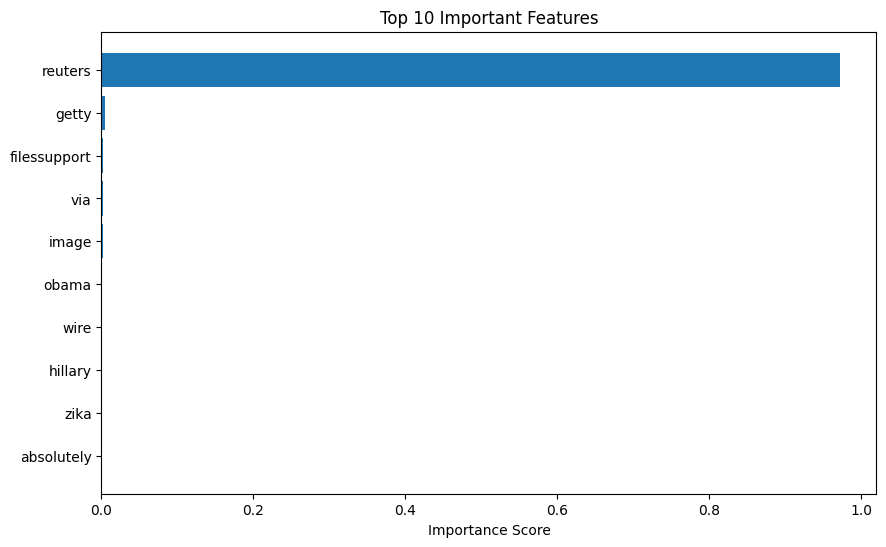

In [96]:
importances = DT.feature_importances_
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(10,6))
plt.title("Top 10 Important Features")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [vectorization.get_feature_names_out()[i] for i in indices])
plt.xlabel("Importance Score")
plt.show()

##3. Gradient Boosting Classifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
GB = GradientBoostingClassifier(random_state=0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [54]:
pred_gb = GB.predict(xv_test)

In [55]:
GB.score(xv_test, y_test)

0.9942093541202672

In [56]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5802
           1       0.99      1.00      0.99      5423

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



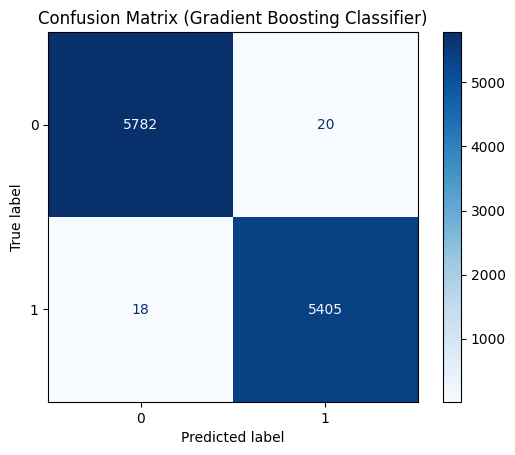

In [88]:
cm_gb = confusion_matrix(y_test, pred_dt)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=DT.classes_)
disp_gb.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Gradient Boosting Classifier)")
plt.show()

##4. RandomForest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
RF = RandomForestClassifier(random_state=0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [59]:
pred_rf = RF.predict(xv_test)

In [60]:
RF.score(xv_test, y_test)

0.9889532293986637

In [61]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5802
           1       0.99      0.99      0.99      5423

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



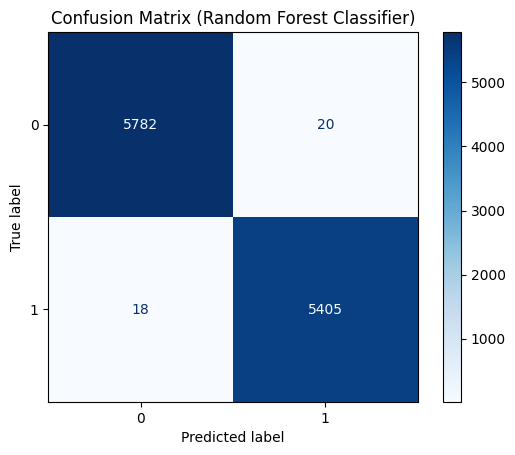

In [89]:
cm_rf = confusion_matrix(y_test, pred_dt)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=DT.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Random Forest Classifier)")
plt.show()

####Feature Importance

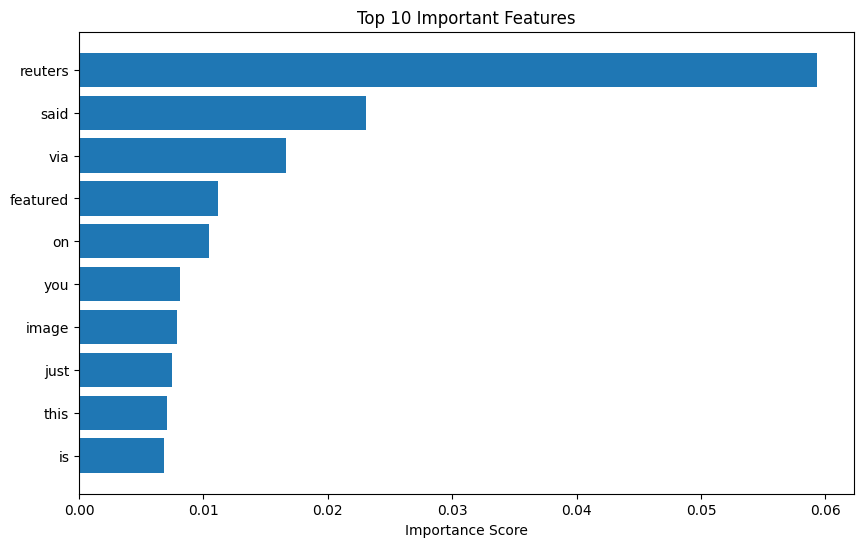

In [97]:
importances = RF.feature_importances_
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(10,6))
plt.title("Top 10 Important Features")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [vectorization.get_feature_names_out()[i] for i in indices])
plt.xlabel("Importance Score")
plt.show()

####Class Imbalance

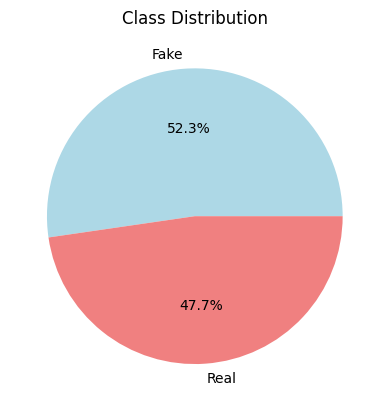

In [100]:
data['class'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Fake', 'Real'], colors=['lightblue', 'lightcoral'])
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

##Model Testing

In [62]:
def output_label(n):
  if n == 0:
    return "Fake News"
  elif n == 1:
    return "Not A Fake News"

def manual_testing(news):
  testing_news = {"text":[news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test['text'] = new_def_test['text'].apply(process_text)
  new_x_test = new_def_test['text']
  new_xv_test = vectorization.transform(new_x_test)

  pred_LR = LR.predict(new_xv_test)
  pred_DT = DT.predict(new_xv_test)
  pred_GB = GB.predict(new_xv_test)
  pred_RF = RF.predict(new_xv_test)

  return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_label(pred_LR[0]),
                                                                                                            output_label(pred_DT[0]),
                                                                                                            output_label(pred_GB[0]),
                                                                                                            output_label(pred_RF[0])))

In [77]:
news = str(input("Enter news: "))
manual_testing(news)

Enter news: Conflict Between India and Pakistan By the Center for Preventive Action. A deadly militant attack in Pahalgam, Indian-administered Kashmir, has triggered a sharp escalation between India and Pakistan, with both sides exchanging gunfire across the Line of Control and downgrading diplomatic ties. On May 6, India announced the launch of "Operation Sindoor," a military strike targeting nine sites in Pakistan and Pakistan-administered Jammu and Kashmir, which it alleged were used to plan the attacks. The situation has heightened fears of a broader military conflict between the two nuclear-armed nations, marking the most significant bilateral confrontation since 2019.  Background The conflict between India and Pakistan arose out of the 1947 Partition of British India. The Partition established a Muslim-majority Pakistan and a Hindu-majority India and provided the diverse regions of Jammu and Kashmir the opportunity to choose which country to accede to. The maharaja (Kashmir’s mon